## Read in the data

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/HuanLei07/EDA_in_Python/main/Data_sessions.csv')
df.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205,80746,10/30/19,False,True,True,True,False,0,24.0,3,1146,0,1564
1,624241,24520,10/30/19,True,True,True,True,False,2,3.0,5,133,0,1766
2,111002,32047,10/30/19,True,True,True,True,False,1,5.0,5,1571,0,2230
3,545113,23404,10/30/19,True,True,True,False,False,1,10.0,21,0,0,633
4,750269,40235,10/30/19,True,True,False,True,False,3,16.0,0,1405,0,1679


In [2]:
df.shape

(300, 14)

There are 300 observations and 14 variables in Data_sessions dataset. 

## Evaluating for Missing Data

In [3]:
missing_data = df[df.isnull().any(axis = 1)]
missing_data

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
35,862128,23404,10/26/19,True,False,True,True,False,2,NaN,2,1120,0,95


In [4]:
df.dropna(subset = ['session_likes_given'], axis = 0, inplace = True)
df.shape

(299, 14)

In [5]:
# list the data types for each column
print(df.dtypes)

session_id                  int64
customer_id                 int64
login_date                 object
projects_added               bool
likes_given                  bool
comment_given                bool
inactive_status              bool
bug_occured                  bool
session_projects_added      int64
session_likes_given       float64
session_comments_given      int64
inactive_duration           int64
bugs_in_session             int64
session_duration            int64
dtype: object


There is one missing data point in the dataset, so we could simply delete it. In the clean dataset, there are 299 observations and 14 variables, including 7 integer, 1 float, 5 logical varialbes and 1 factor data types. 

In [6]:
# general information about the distribution of the dataset
df.describe()

,session_id,customer_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,529534.652174,45028.849498,1.618729,10.458194,2.408027,731.638796,1.237458,1190.414716
std,280232.153769,26426.038013,1.336799,9.474839,2.251190,839.247660,1.759100,686.871418
min,22885.000000,10246.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,307856.000000,23579.000000,1.000000,0.000000,0.500000,0.000000,0.000000,614.000000
50%,552796.000000,39475.000000,2.000000,9.000000,2.000000,312.000000,0.000000,1152.000000
75%,802738.000000,73245.000000,3.000000,19.000000,4.000000,1525.500000,2.500000,1778.000000
max,999480.000000,98653.000000,9.000000,27.000000,21.000000,2480.000000,5.000000,2395.000000


## Data Visualization
Analyzing Individual Feature Patterns using Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
%matplotlib inline 

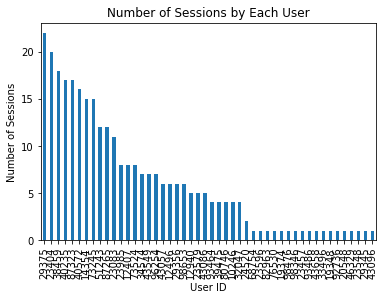

In [9]:
# number of sessions each user had in October 2019
df['customer_id'].value_counts().plot(kind = 'bar')
plt.title("Number of Sessions by Each User")
plt.xlabel("User ID")
plt.ylabel("Number of Sessions");

In [10]:
df['customer_id'].value_counts().median()

4.5

In [11]:
df['customer_id'].value_counts()

29375    22
23404    20
38459    18
40235    17
87323    17
40572    16
14354    15
73245    15
51243    12
87265    12
23083    11
23985     8
12407     8
73524     8
34574     7
43549     7
96254     7
43057     6
12496     6
29356     6
98653     6
12940     5
23579     5
43086     5
93464     4
39475     4
80746     4
10246     4
32047     4
24520     2
68754     1
23596     1
82963     1
76530     1
19374     1
98476     1
98346     1
23457     1
93486     1
43658     1
33496     1
19348     1
92736     1
20548     1
46329     1
23548     1
29345     1
43096     1
Name: customer_id, dtype: int64

In [12]:
len(df['customer_id'].unique())

48

In [ ]:
1 - 18 /48

0.625

48 users logged into their accounts, among which 62.5% users logged more than once, which means good engagement. The median of number of logging into the account is 4.5.

In [13]:
df.columns

Index(['session_id', 'customer_id', 'login_date', 'projects_added',
       'likes_given', 'comment_given', 'inactive_status', 'bug_occured',
       'session_projects_added', 'session_likes_given',
       'session_comments_given', 'inactive_duration', 'bugs_in_session',
       'session_duration'],
      dtype='object')

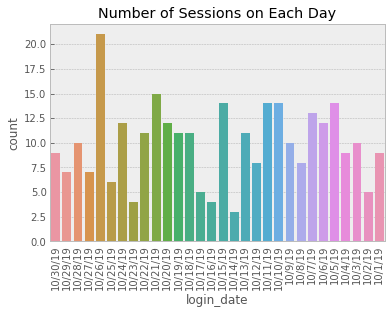

In [ ]:
# distribution of sessions in October 2019
plt.style.use('bmh')

fig, ax = plt.subplots()

g = sns.countplot(x = 'login_date',
              data = df)
plt.xticks(rotation = 90)
g.set_title('Number of Sessions on Each Day')
plt.show()

In [ ]:
df['login_date'].value_counts().median()

10.0

It shows on 10/26/2019, the number of sessions was the maximum with 21 sessions. The median number of sessions created is 10. Sessions on first half of the month slightly more than the second half in October 2019. 

> ### **Projects**

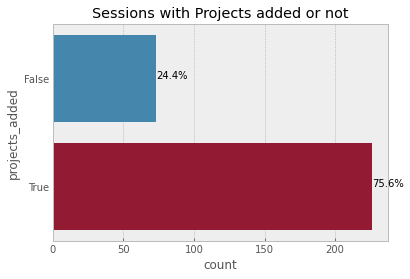

In [ ]:
# sessions with projects added or not in October 2019
plt.style.use('bmh')

fig, ax = plt.subplots()

g = sns.countplot(y = 'projects_added', 
                  data = df)

total = len(df['projects_added'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

g.set_title('Sessions with Projects added or not')
plt.show()

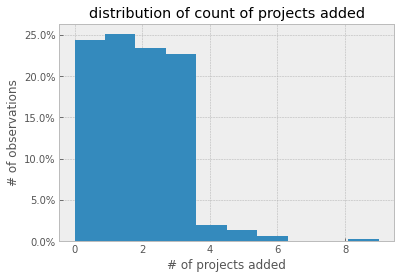

In [ ]:
# distribution of count of projects added in October 2019
plt.style.use('bmh')

fig, ax = plt.subplots()

ax.hist(df['session_projects_added'], 
        weights = np.ones(len(df)) / len(df))

ax.set_xlabel('# of projects added')
ax.set_ylabel('# of observations')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('distribution of count of projects added')

plt.show()

Most sessions(75.6%) were created with projects added when people logged into the account to showcase what they have done. Among those, about 75% of people choose to add within 3 projects. Mean of number of projects added is 1.618729. 

> ### **Likes**

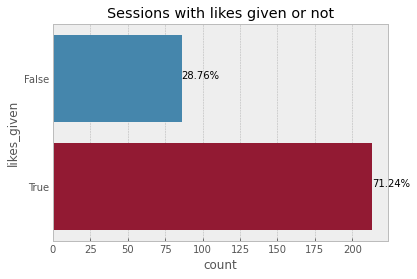

In [ ]:
# sessions with likes given or not in October 2019
plt.style.use('bmh')

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

g = sns.countplot(y = 'likes_given', 
                  data = df)

total = len(df['likes_given'])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

g.set_title('Sessions with likes given or not')
plt.show()

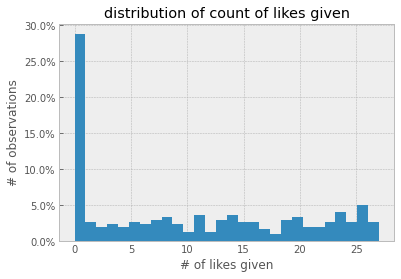

In [ ]:
# distribution of count of likes added in October 2019
plt.style.use('bmh')

fig, ax = plt.subplots()

ax.hist(df['session_likes_given'], 
        bins = 28,
        weights = np.ones(len(df)) / len(df))

ax.set_xlabel('# of likes given')
ax.set_ylabel('# of observations')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('distribution of count of likes given')

plt.show()

About 70% of people would like to interact with people on the platform to show their support for people by giving likes. Numbers of likes given by people vary from 1 to 27 and mean number is 10.458194. 

> ### **Comment**

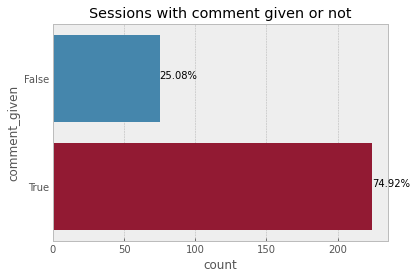

In [ ]:
# sessions with comment given or not in October 2019
plt.style.use('bmh')

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

g = sns.countplot(y = 'comment_given', 
                  data = df)

total = len(df['comment_given'])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

g.set_title('Sessions with comment given or not')
plt.show()

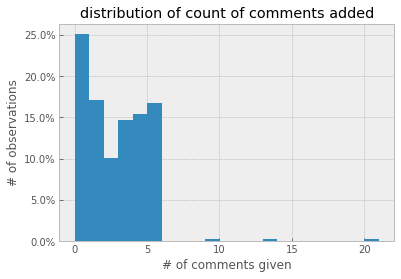

In [ ]:
# distribution of count of comments given in October 2019
plt.style.use('bmh')

fig, ax = plt.subplots()

ax.hist(df['session_comments_given'], 
        bins = 21,
        weights = np.ones(len(df)) / len(df))

ax.set_xlabel('# of comments given')
ax.set_ylabel('# of observations')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('distribution of count of comments added')

plt.show()

About 75% sessions have comments created. People spend more time showing interests to other people's work by commenting, which is slightly higher than that of likes given. Most people would like to give within 5 comments each time when they log into the account, mean number is 2.408027 much smaller than likes given considering the effors for giving comments are more than that of giving likes.

> ### **Inactive Status**

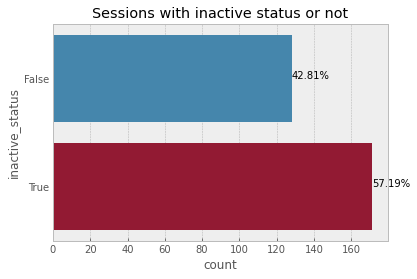

In [ ]:
# sessions with inactive status or not in October 2019
plt.style.use('bmh')

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

g = sns.countplot(y = 'inactive_status', 
                  data = df)

total = len(df['inactive_status'])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

g.set_title('Sessions with inactive status or not')
plt.show()

Nearly 50% of people do not have inactive status during the session, which means they were fully focused on the projects or interacting with other people's work.

> ### **Session Duration**

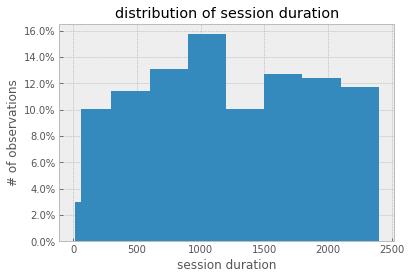

In [ ]:
# distribution of session duration in seconds in October 2019
plt.style.use('bmh')
fig, ax = plt.subplots()

ax.hist(df['session_duration'],
        bins = [10, 60, 300, 600, 900, 1200, 1500, 1800, 2100, 2400],
        weights = np.ones(len(df)) / len(df))

ax.set_xlabel('session duration')
ax.set_ylabel('# of observations')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('distribution of session duration')

plt.show()

About 3% of sessions were less than 1 minute, which I believe is not engaged. About 10% sessions were within 5 minutes, which is long enough for people to give likes or quick comments. More than 75% sessions have duration more than 10 minutes on the account. 

> ### **Inactive Duration**

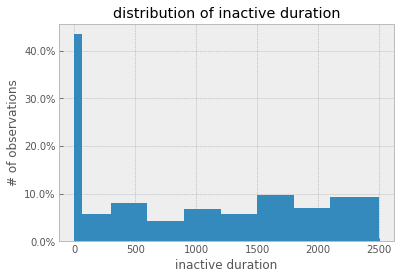

In [ ]:
# distribution of inactive duration in seconds in October 2019
plt.style.use('bmh')
fig, ax = plt.subplots()

ax.hist(df['inactive_duration'],
        bins = [0, 60, 300, 600, 900, 1200, 1500, 1800, 2100, 2500],
        weights = np.ones(len(df)) / len(df))

ax.set_xlabel('inactive duration')
ax.set_ylabel('# of observations')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('distribution of inactive duration')

plt.show()

More than 40% sessions have less than 1 minute inactive duration which means users were fully focused on the platform adding projects or browsing other people's work.

## **User Engagement**

My definition for engagement is if a user have one or more of the following actions, then the user is engaged.
* adding projects
* giving likes
* giving comments 
* session more than 10 minutes

In [14]:
# extract user engagement data 
df_engaged = df.loc[(df['projects_added'] > 0) | 
                    (df['likes_given'] > 0) | 
                    (df['comment_given'] > 0) |
                    (df['session_duration'] >= 300)]
df_engaged.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205,80746,10/30/19,False,True,True,True,False,0,24.0,3,1146,0,1564
1,624241,24520,10/30/19,True,True,True,True,False,2,3.0,5,133,0,1766
2,111002,32047,10/30/19,True,True,True,True,False,1,5.0,5,1571,0,2230
3,545113,23404,10/30/19,True,True,True,False,False,1,10.0,21,0,0,633
4,750269,40235,10/30/19,True,True,False,True,False,3,16.0,0,1405,0,1679


In [ ]:
df.iloc[13]

session_id                  361637
customer_id                  51243
login_date                10/29/19
projects_added                True
likes_given                   True
comment_given                False
inactive_status              False
bug_occured                  False
session_projects_added           3
session_likes_given             24
session_comments_given           0
inactive_duration                0
bugs_in_session                  0
session_duration                39
Name: 13, dtype: object

In [ ]:
len(df_engaged)

295

It turns out, all data are engaged, which is awesome for what the platform has done so far. Congratulations! 

> ### **Bugs**

In [ ]:
# data with projects added
df_projects_added = df.loc[lambda df: df['session_projects_added'] > 0, :]
df_projects_added.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
1,624241,24520,10/30/19,True,True,True,True,False,2,3.0,5,133,0,1766
2,111002,32047,10/30/19,True,True,True,True,False,1,5.0,5,1571,0,2230
3,545113,23404,10/30/19,True,True,True,False,False,1,10.0,21,0,0,633
4,750269,40235,10/30/19,True,True,False,True,False,3,16.0,0,1405,0,1679
5,744943,73245,10/30/19,True,True,True,True,True,3,27.0,5,1746,4,1490


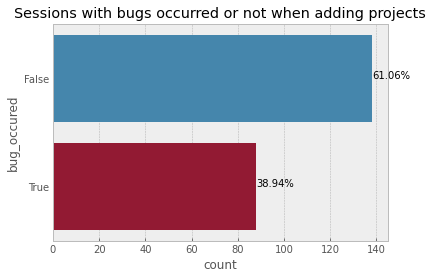

In [ ]:
# sessions with bugs occurred or not when adding projects in October 2019
plt.style.use('bmh')

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

g = sns.countplot(y = 'bug_occured', 
                  data = df_projects_added)

total = len(df_projects_added)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

g.set_title('Sessions with bugs occurred or not when adding projects')
plt.show()

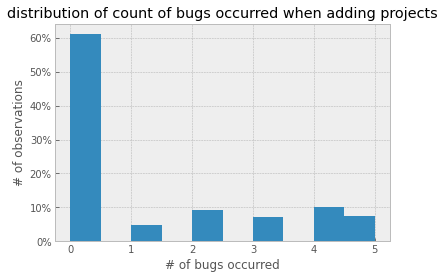

In [ ]:
# distribution of count of bugs occurred in October 2019
plt.style.use('bmh')

fig, ax = plt.subplots()

ax.hist(df_projects_added['bugs_in_session'], 
        weights = np.ones(len(df_projects_added)) / len(df_projects_added))

ax.set_xlabel('# of bugs occurred')
ax.set_ylabel('# of observations')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('distribution of count of bugs occurred when adding projects')

plt.show()

When people add projects to their account, about 60% of chance that they could add without any bugs occurred. The maximum number of bug people ran into is 5. 

## **Correlation**

In [ ]:
df.corr()

,session_id,customer_id,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
session_id,1.000000,-0.041766,0.105472,-0.118823,0.008198,0.064912,-0.129564,0.107919,-0.111805,0.087228,0.051335,-0.160055,-0.007147
customer_id,-0.041766,1.000000,0.085221,-0.022051,0.021665,-0.018100,0.054304,0.157838,-0.030708,-0.035146,-0.014802,0.049826,-0.056896
projects_added,0.105472,0.085221,1.000000,0.000058,-0.041506,-0.003947,0.005130,0.689355,-0.003747,-0.052704,-0.039180,-0.007384,0.042318
likes_given,-0.118823,-0.022051,0.000058,1.000000,0.075473,-0.071915,0.035853,-0.054197,0.702541,0.095637,-0.033793,0.005980,-0.035065
comment_given,0.008198,0.021665,-0.041506,0.075473,1.000000,-0.048446,0.017369,-0.049690,0.085124,0.619988,-0.040904,0.029915,0.021232
inactive_status,0.064912,-0.018100,-0.003947,-0.071915,-0.048446,1.000000,0.120109,0.031388,-0.084572,0.006699,0.755511,0.128532,0.072894
bug_occured,-0.129564,0.054304,0.005130,0.035853,0.017369,0.120109,1.000000,0.021741,0.060116,-0.031551,0.120919,0.885043,-0.029758
session_projects_added,0.107919,0.157838,0.689355,-0.054197,-0.049690,0.031388,0.021741,1.000000,-0.014775,-0.065215,0.001022,-0.038429,0.018398
session_likes_given,-0.111805,-0.030708,-0.003747,0.702541,0.085124,-0.084572,0.060116,-0.014775,1.000000,0.048944,-0.076404,0.032711,-0.057032
session_comments_given,0.087228,-0.035146,-0.052704,0.095637,0.619988,0.006699,-0.031551,-0.065215,0.048944,1.000000,0.011550,-0.020312,0.010574


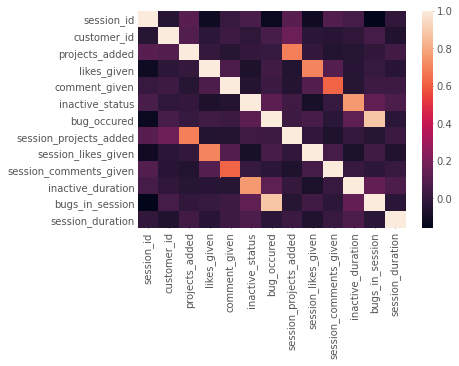

In [ ]:
sns.heatmap(df.corr())

There are some highly correlated pairs of varialbes in the dataset:
* session_projects_added vs. projects_added
* session_likes_given vs. likes_given
* session_comments_given vs. comment_given
* inactive_duration vs. inactive_status
* bugs_in_session vs. bug_occured

All of these pairs make sense, since they are categorical vs. quantitative correspondingly. 

## **Conclusion**

- 62.5% of people logged into their account more than once, and median number of looging into the account is 4.5.
- On average, there are 10 sessions created each day. 
- 75.6% sessions were created with projects added.
- About 70% of people would like to give likes.
- About 75% sessions have comments created.
- More than 75% sessions have duration more than 10 minutes on the account.
- Almost 100% sessions would at least do one thing: add projects or give likes or comment.
- Largest number of bugs occurred is 5.


## **Future**

* How to control the number of bugs occurred in each session. 
* How to increase number of times people log into the account and the session duration. 
* How to encourage users to engage more: add projects, give likes and comments. 